# My CNN 

## Dataset loading

In [5]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 19s 0us/step


In [4]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


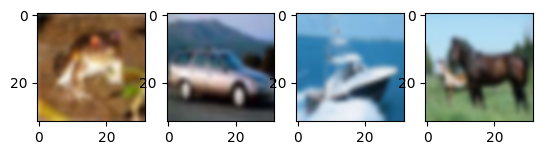

In [5]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Normalize (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


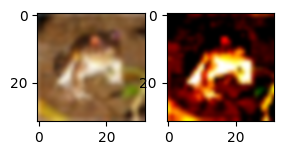

In [6]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
No

In [12]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=32,
                    epochs=15, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)


Epoch 1/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6260 - accuracy: 0.4265 - val_loss: 1.5446 - val_accuracy: 0.4581
Epoch 2/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5566 - accuracy: 0.4533 - val_loss: 1.5403 - val_accuracy: 0.4616
Epoch 3/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5096 - accuracy: 0.4681 - val_loss: 1.4929 - val_accuracy: 0.4747
Epoch 4/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4664 - accuracy: 0.4825 - val_loss: 1.4956 - val_accuracy: 0.4772
Epoch 5/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4310 - accuracy: 0.4958 - val_loss: 1.4670 - val_accuracy: 0.4847
Epoch 6/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3996 - accuracy: 0.5077 - val_loss: 1.4645 - val_accuracy: 0.4832
Epoch 7/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3616 - accuracy: 0.5234 - val_loss: 1.4411 - val_

[1.4819530248641968, 0.5090000033378601]

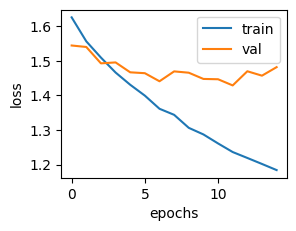

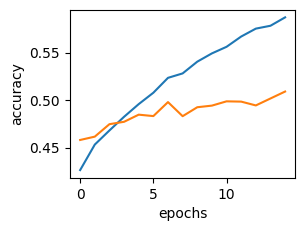

In [13]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()